# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

In [ ]:
#Checking if the GPU is connected
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Importing and Analysing the dataset**

In [ ]:
df = pd.read_csv("kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Following is the description of every column in the dataset** :  
   
*  **id** - ID of transaction of selling house. 
*  **date** - Date of selling.  
*  **price** - Price of house sold.  
*  **bedrooms** - Number of bedroomsin the house.  
*  **bathrooms** - Number of bathrooms in the house, where .5 accounts for a room with a toilet but no shower.  
*  **sqft_living** - Area of the house's interior living space in square foot.  
*  **sqft_lot** - Area of the land space in square foot.  
*  **floors** - Number of floors in the house.  
*  **waterfront** - A dummy variable for whether the house is facing the waterfront or not.  
*  **view** - An index from 0 to 4 of how good the view of the house was.  
*  **condition** - An index from 1 to 5 on the condition of the house.  
*  **grade** - An index from 1 to 13, where the range 1-3 means bad building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.  
*  **sqft_above** - Area of the interior housing space that is above ground level in square foot.  
*  **sqft_basement** - Area of the interior housing space that is below ground level in square foot.  
*  **yr_built** - The year the house was initially built. 
*  **yr_renovated** - The year of the house’s last renovation.  
*  **zipcode** - Zipcode of the house's locality.  
*  **lat** - Lattitude of the exact location of the house.  
*  **long** - Longitude of the exact location of the house.  
*  **sqft_living15** - Area of interior housing living space for the nearest 15 neighbors in square foot.  
*  **sqft_lot15** - Area of the land lots of the nearest 15 neighbors in square foot.  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From above we can conclude:
*   There are no null values in the dataset.
*   We can remove id column as it does not help in prediction.
*   We need to convert date column into datetime format and further analyse how price depends on it.
*   We can also remove zipcode, as the information it contains is retained in lat and long columns.

Further, we will see a correlation matrix through which we can check the correlation among numerical features.


# **Data Cleaning**

In [ ]:
#Changing date of purchase column's objects to date time format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Defining functions to convert datetime format objects into year and month
def to_month(x):
  return x.month
  
def to_year(x):
  return x.year

In [ ]:
#Adding new columns for month and year by applying the functions
df['month'] = df['date'].apply(to_month)
df['year'] = df['date'].apply(to_year)

In [ ]:
#Checking the price variation with respect to month
df.groupby('month').median()['price']

month
1     438500.0
2     425545.0
3     450000.0
4     476500.0
5     462000.0
6     465000.0
7     465000.0
8     442100.0
9     450000.0
10    446900.0
11    435000.0
12    432500.0
Name: price, dtype: float64

Since, the price is not moving much with respect to month, we will also remove month column.

**Correlation matrix**

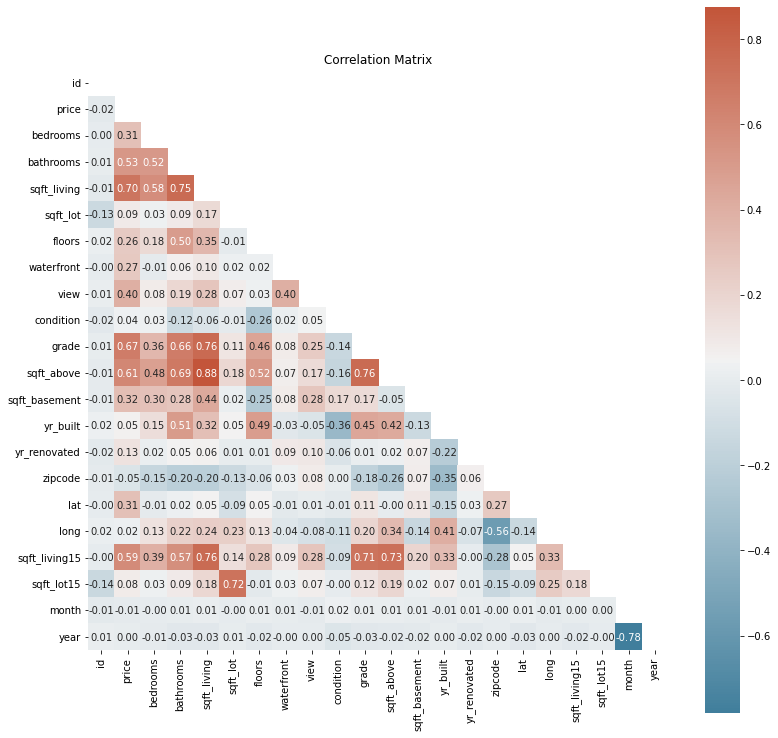

In [ ]:
plt.figure(figsize = (13,13))
plt.title("Correlation Matrix")

correlation = df.corr()
mask = np.triu(np.ones_like(correlation))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data = correlation, mask = mask, annot = True, fmt = '.2f', square = True, cmap = cmap)
plt.show()

By looking at the correlation matrix, we can also remove sqft_above as it is very correlated to sqft_living which in turn is highly correlated to price. Hence by removing it, the information will still be there.

In [ ]:
#Listing all the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [ ]:
#Removing unwanted columns
df.drop(columns = ['id', 'date', 'sqft_above', 'zipcode', 'month'], inplace = True)

In [ ]:
#Final dataset on which we can start building the model
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,-122.069,1410,1287,2015


# **Preparing the data for training**

In [ ]:
#Dividing dataset into a dataframe (matrix) of input variables (X) and a data series (array) of target variable (y).
X = df.drop(columns = ['price'])
y = df['price']

In [ ]:
#Splitting the dataset into train, validation and test set in 70:20:10 ratio.
X_train, tempX, y_train, tempy = train_test_split(X, y, test_size = 0.3, random_state = 3)
X_val, X_test, y_val, y_test = train_test_split(tempX, tempy, test_size = 1/3, random_state = 3)

In [ ]:
#Scaling the input variables to a [0,1] scale to make the model less complex as many values have different range
scaling_model = MinMaxScaler()

X_train = scaling_model.fit_transform(X_train)
X_val = scaling_model.transform(X_val)
X_test = scaling_model.transform(X_test)

In [ ]:
#A function to get evaluations on the models
def evaluation(model, X, y, title):
  loss = pd.DataFrame(model.history.history)
  prediction = model.predict(X)
  
  mse = mean_squared_error(y, prediction)
  mae = mean_absolute_error(y, prediction)
  regression_score = explained_variance_score(y, prediction)   #The higher the better


  loss.plot(figsize = (10,6), title = title, xlabel = 'Epochs', ylabel = 'Loss')
  plt.grid(True)
  plt.show()

  print("\nEvaluation Scores")
  print("Mean Squared Error:", mse)
  print("Mean Absolute Error:", mae)
  print("Regression Score:", regression_score)

# **Model Training**

## Base Model

In [ ]:
#Building a base NN model for regression
model = Sequential()

#Adding Layers
#Input Layer
model.add(Input(shape = X_train.shape[1:]))

#Adding single Hidden Layer with 20 neurons
#Using ReLU activation function
model.add(Dense(10, activation = 'relu'))

#Output Layer
#Generally, in regression no activation function is used but here we are taking ReLU because price is always positive
model.add(Dense(1, activation = 'relu'))

#Using loss: MSE and optimiser: ADAM
model.compile(optimizer = Adam(0.01), loss = MeanSquaredError())

#Fitting the model
model.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 3s 4ms/step - loss: 425585344512.0000 - val_loss: 414601379840.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 422330826752.0000 - val_loss: 409834684416.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 416225656832.0000 - val_loss: 402547441664.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 407809294336.0000 - val_loss: 393173467136.0000
Epoch 5/50
473/473 [==============================] - 3s 6ms/step - loss: 397511327744.0000 - val_loss: 382119346176.0000
Epoch 6/50
473/473 [==============================] - 3s 6ms/step - loss: 385639415808.0000 - val_loss: 369644240896.0000
Epoch 7/50
473/473 [==============================] - 3s 6ms/step - loss: 372516585472.0000 - val_loss: 356083007488.0000
Epoch 8/50
473/473 [==============================] - 3s 6ms/step - loss: 358398263296.0000 - val_loss: 341614657536.0000
Epoch 9/50
473/473 [====

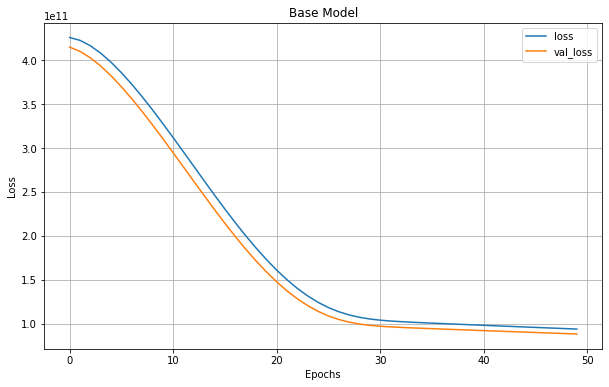


Evaluation Scores
Mean Squared Error: 88554463131.5149
Mean Absolute Error: 189412.46115079825
Regression Score: 0.31537178300065405


In [ ]:
#Loss graph and regression score of the base model
evaluation(model, X_val, y_val, title = 'Base Model')

## Hyperparameter Tuning

### 1. Activation Function - [tanh, sigmoid]
ReLU is not being tested as it is already in the base model

#### Training

In [ ]:
#Model 1.1 - Activation: tanh
model_11 = Sequential()

#Input Layer
model_11.add(Input(shape = X_train.shape[1:]))

#Hidden
model_11.add(Dense(10, activation = 'tanh'))

#Output Layer
model_11.add(Dense(1, activation = 'relu'))

#Compilation
model_11.compile(optimizer = Adam(learning_rate = 0.01), loss = MeanSquaredError())

#Fitting the model
model_11.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 426083811328.0000 - val_loss: 416158089216.0000
Epoch 2/50
473/473 [==============================] - 2s 3ms/step - loss: 426021584896.0000 - val_loss: 416100286464.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 425964240896.0000 - val_loss: 416043958272.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 425907978240.0000 - val_loss: 415987924992.0000
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 425851748352.0000 - val_loss: 415932350464.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 425795780608.0000 - val_loss: 415876841472.0000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 425739878400.0000 - val_loss: 415821266944.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 425684238336.0000 - val_loss: 415765856256.0000
Epoch 9/50
473/473 [====

In [ ]:
#Model 1.2 - Activation: sigmoid
model_12 = Sequential()

#Input Layer
model_12.add(Input(shape = X_train.shape[1:]))

#Hidden
model_12.add(Dense(10, activation = 'sigmoid'))

#Output Layer
model_12.add(Dense(1, activation = 'relu'))

#Compilation
model_12.compile(optimizer = Adam(learning_rate = 0.01), loss = MeanSquaredError())

#Fitting the model
model_12.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 426084237312.0000 - val_loss: 416160546816.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 426024566784.0000 - val_loss: 416103104512.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 425967517696.0000 - val_loss: 416046874624.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 425910796288.0000 - val_loss: 415990939648.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 425854926848.0000 - val_loss: 415935299584.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 425798664192.0000 - val_loss: 415879856128.0000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 425743319040.0000 - val_loss: 415824445440.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 425687744512.0000 - val_loss: 415769100288.0000
Epoch 9/50
473/473 [====

#### Evaluation

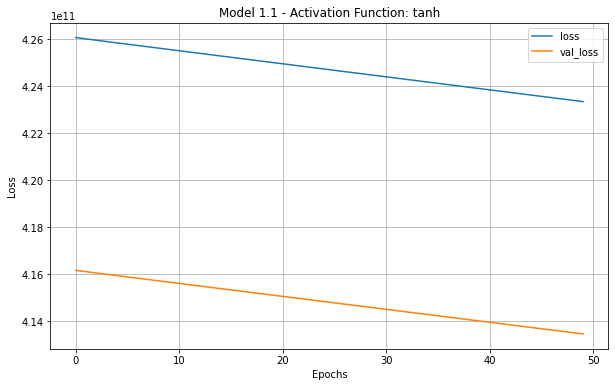


Evaluation Scores
Mean Squared Error: 413446121564.6414
Mean Absolute Error: 533635.0154004042
Regression Score: 0.0


In [ ]:
#Evaluation of model 1.1
evaluation(model_11, X_val, y_val, title = 'Model 1.1 - Activation Function: tanh')

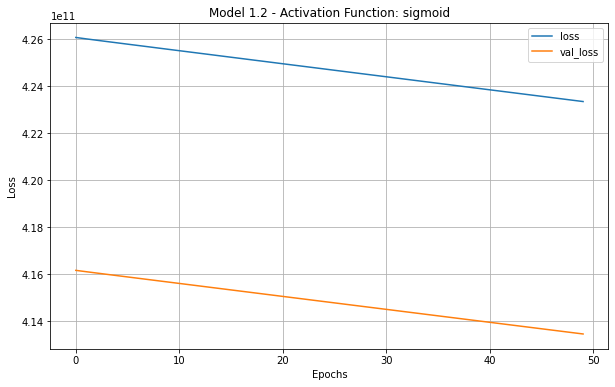


Evaluation Scores
Mean Squared Error: 413449517765.6201
Mean Absolute Error: 533638.1975294234
Regression Score: 6.494804694057166e-13


In [ ]:
#Evaluation of model 1.2
evaluation(model_12, X_val, y_val, title = 'Model 1.2 - Activation Function: sigmoid')

By looking at the loss graphs and the evaluation metrics, it can be concluded that ReLU activation function works better than both tanh and sigmoid activation function for our problem. So we will fix activation function to be ReLU and tune other hyperparameters.

### 2. Optimizer - [RMSprop, Adagrad]
Adam is not being tested as it is already in the base model.

#### Training

In [ ]:
#Model 2.1 - Optimizer - RMSprop
model_21 = Sequential()

#Input Layer
model_21.add(Input(shape = X_train.shape[1:]))

#Hidden
model_21.add(Dense(10, activation = 'relu'))

#Output Layer
model_21.add(Dense(1, activation = 'relu'))

#Compilation
model_21.compile(optimizer = RMSprop(learning_rate = 0.01), loss = MeanSquaredError())

#Fitting the model
model_21.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 5s 4ms/step - loss: 426019979264.0000 - val_loss: 415865733120.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 425076064256.0000 - val_loss: 414286741504.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 422845448192.0000 - val_loss: 411438907392.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 419344678912.0000 - val_loss: 407335632896.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 414600953856.0000 - val_loss: 402010963968.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 408649302016.0000 - val_loss: 395492917248.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 401494310912.0000 - val_loss: 387837460480.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 393269248000.0000 - val_loss: 379106066432.0000
Epoch 9/50
473/473 [====

In [ ]:
#Model 2.2 - Optimizer - Adagrad
model_22 = Sequential()

#Input Layer
model_22.add(Input(shape = X_train.shape[1:]))

#Hidden
model_22.add(Dense(10, activation = 'relu'))

#Output Layer
model_22.add(Dense(1, activation = 'relu'))

#Compilation
model_22.compile(optimizer = Adagrad(learning_rate = 0.01), loss = MeanSquaredError())

#Fitting the model
model_22.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 3ms/step - loss: 426110189568.0000 - val_loss: 416213204992.0000
Epoch 2/50
473/473 [==============================] - 2s 3ms/step - loss: 426101964800.0000 - val_loss: 416204521472.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 426093215744.0000 - val_loss: 416195313664.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 426083713024.0000 - val_loss: 416186204160.0000
Epoch 5/50
473/473 [==============================] - 1s 3ms/step - loss: 426074570752.0000 - val_loss: 416177324032.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 426065526784.0000 - val_loss: 416168312832.0000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 426056810496.0000 - val_loss: 416159367168.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 426047864832.0000 - val_loss: 416150487040.0000
Epoch 9/50
473/473 [====

#### Evaluation

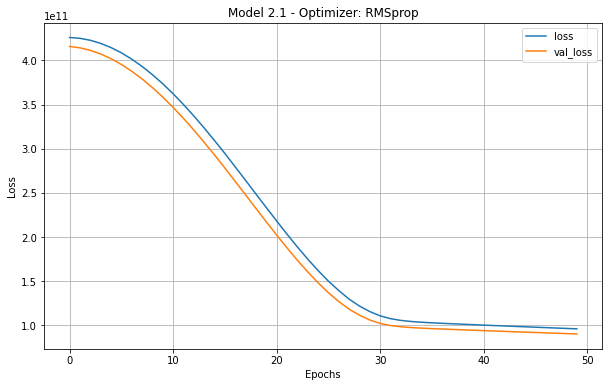


Evaluation Scores
Mean Squared Error: 90248048711.71428
Mean Absolute Error: 190680.64136973623
Regression Score: 0.30142838204326694


In [ ]:
#Evaluation of model 2.1
evaluation(model_21, X_val, y_val, title = 'Model 2.1 - Optimizer: RMSprop')

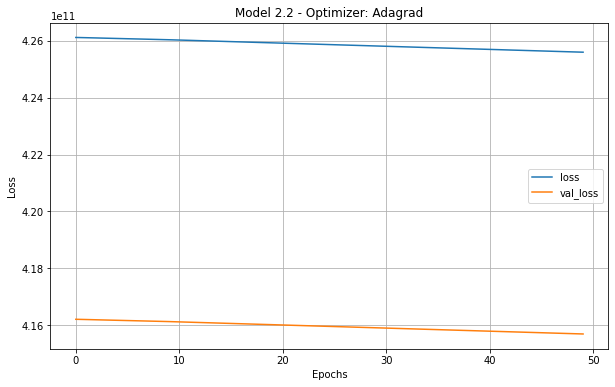


Evaluation Scores
Mean Squared Error: 415697249486.9499
Mean Absolute Error: 535770.6820653009
Regression Score: 0.000254633431831075


In [ ]:
#Evaluation of model 2.2
evaluation(model_22, X_val, y_val, title = 'Model 2.2 - Optimizer: Adagrad')

By looking at the loss graphs and the evaluation metrics, it can be concluded that Adam optimizer works better than both RMSprop and Adagrad. So we'll fix optimizer to be Adam and tune other hyperparameters.

### 3. Loss Function - [MAE]
MAE: Mean Absolute Error
We're not testing Mean Squared Error here since it is a part of base model.

#### Training

In [ ]:
#Model 3.1 - Loss Function - Mean Absolute Error
model_31 = Sequential()

#Input Layer
model_31.add(Input(shape = X_train.shape[1:]))

#Hidden
model_31.add(Dense(10, activation = 'relu'))

#Output Layer
model_31.add(Dense(1, activation = 'relu'))

#Compilation
model_31.compile(optimizer = Adam(learning_rate = 0.01), loss = MeanAbsoluteError())

#Fitting the model
model_31.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 539086.9375 - val_loss: 535059.8750
Epoch 2/50
473/473 [==============================] - 2s 3ms/step - loss: 536751.0000 - val_loss: 531612.1875
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 532316.5000 - val_loss: 526239.2500
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 526092.6875 - val_loss: 519202.3438
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 518298.1875 - val_loss: 510682.8125
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 509095.3750 - val_loss: 500823.5000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 498602.2188 - val_loss: 489717.8125
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 486897.3750 - val_loss: 477434.2500
Epoch 9/50
473/473 [==============================] - 2s 3ms/step - loss: 474040.7500 - val_loss: 464021.3438
Epoch 10/5

#### Evaluation

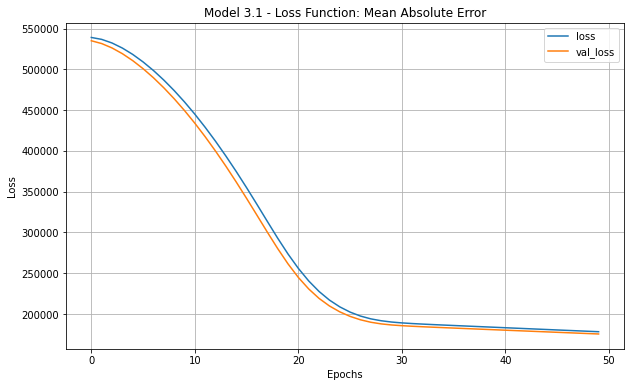


Evaluation Scores
Mean Squared Error: 95625992720.05597
Mean Absolute Error: 175596.93435836997
Regression Score: 0.2880246179294309


In [ ]:
#Evaluation of model 3.1
evaluation(model_31, X_val, y_val, title = 'Model 3.1 - Loss Function: Mean Absolute Error')

Changing the loss function did not affect the algorithm by much but still the score decreased so we'll not consider MAE as the loss function and fix MSE or Mean Squared Error as the loss function.

### 4. Learning Rate - [0.001, 0.1, 1, 2]
0.01 will not be tested as it is a part of base model.

#### Training

In [ ]:
#Model 4.1 - Learning Rate - 0.001
model_41 = Sequential()

#Input Layer
model_41.add(Input(shape = X_train.shape[1:]))

#Hidden
model_41.add(Dense(10, activation = 'relu'))

#Output Layer
model_41.add(Dense(1, activation = 'relu'))

#Compilation
model_41.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanSquaredError())

#Fitting the model
model_41.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 3ms/step - loss: 426115366912.0000 - val_loss: 416222314496.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 426115661824.0000 - val_loss: 416222314496.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 426115399680.0000 - val_loss: 416222314496.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 426115596288.0000 - val_loss: 416222314496.0000
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 426115497984.0000 - val_loss: 416222314496.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 426115465216.0000 - val_loss: 416222314496.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 426115497984.0000 - val_loss: 416222314496.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 426115497984.0000 - val_loss: 416222314496.0000
Epoch 9/50
473/473 [====

In [ ]:
#Model 4.2 - Learning Rate - 0.1
model_42 = Sequential()

#Input Layer
model_42.add(Input(shape = X_train.shape[1:]))

#Hidden
model_42.add(Dense(10, activation = 'relu'))

#Output Layer
model_42.add(Dense(1, activation = 'relu'))

#Compilation
model_42.compile(optimizer = Adam(learning_rate = 0.1), loss = MeanSquaredError())

#Fitting the model
model_42.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 371271368704.0000 - val_loss: 262508380160.0000
Epoch 2/50
473/473 [==============================] - 2s 3ms/step - loss: 177102585856.0000 - val_loss: 110298775552.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 105412231168.0000 - val_loss: 94460919808.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 98405720064.0000 - val_loss: 90745790464.0000
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 94341767168.0000 - val_loss: 87152320512.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 90331783168.0000 - val_loss: 83541835776.0000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 86236045312.0000 - val_loss: 79977070592.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 82198241280.0000 - val_loss: 76333801472.0000
Epoch 9/50
473/473 [===============

In [ ]:
#Model 4.3 - Learning Rate - 1.0
model_43 = Sequential()

#Input Layer
model_43.add(Input(shape = X_train.shape[1:]))

#Hidden
model_43.add(Dense(10, activation = 'relu'))

#Output Layer
model_43.add(Dense(1, activation = 'relu'))

#Compilation
model_43.compile(optimizer = Adam(learning_rate = 1.0), loss = MeanSquaredError())

#Fitting the model
model_43.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 139144790016.0000 - val_loss: 74725498880.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 66755866624.0000 - val_loss: 56576544768.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 54355357696.0000 - val_loss: 50188337152.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 49540079616.0000 - val_loss: 48097169408.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 47314935808.0000 - val_loss: 45479546880.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 45861543936.0000 - val_loss: 44878770176.0000
Epoch 7/50
473/473 [==============================] - 2s 3ms/step - loss: 43688345600.0000 - val_loss: 41215098880.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 40722608128.0000 - val_loss: 39288713216.0000
Epoch 9/50
473/473 [===================

In [ ]:
#Model 4.4 - Learning Rate - 2.0
model_44 = Sequential()

#Input Layer
model_44.add(Input(shape = X_train.shape[1:]))

#Hidden
model_44.add(Dense(10, activation = 'relu'))

#Output Layer
model_44.add(Dense(1, activation = 'relu'))

#Compilation
model_44.compile(optimizer = Adam(learning_rate = 2.0), loss = MeanSquaredError())

#Fitting the model
model_44.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 101690933248.0000 - val_loss: 55249727488.0000
Epoch 2/50
473/473 [==============================] - 2s 3ms/step - loss: 51258118144.0000 - val_loss: 46234931200.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 46448136192.0000 - val_loss: 44328357888.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 43292610560.0000 - val_loss: 40192098304.0000
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 39268261888.0000 - val_loss: 36790632448.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 36766187520.0000 - val_loss: 35114815488.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 35424567296.0000 - val_loss: 34549297152.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 34510458880.0000 - val_loss: 33059069952.0000
Epoch 9/50
473/473 [===================

#### Evaluation

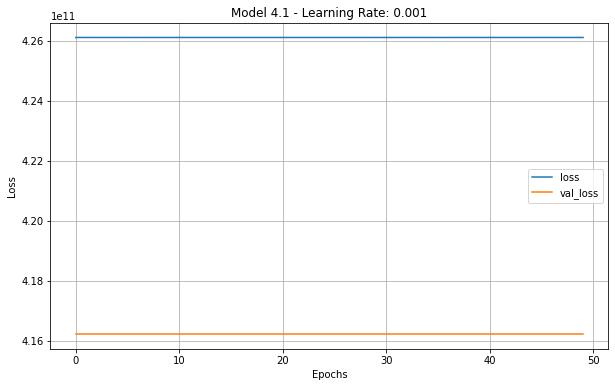


Evaluation Scores
Mean Squared Error: 416222271552.22144
Mean Absolute Error: 536229.8757519667
Regression Score: 0.0


In [ ]:
#Evaluation of model 4.1
evaluation(model_41, X_val, y_val, title = 'Model 4.1 - Learning Rate: 0.001')

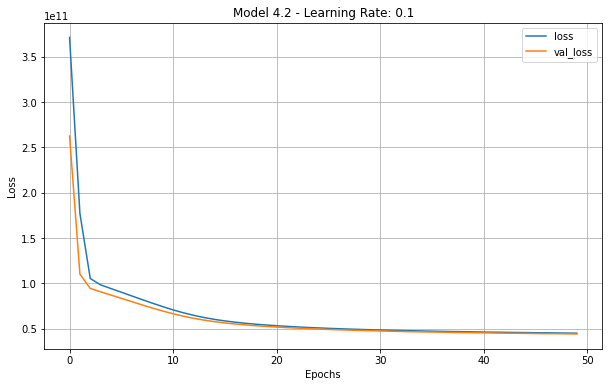


Evaluation Scores
Mean Squared Error: 44260592289.351906
Mean Absolute Error: 129537.48113635203
Regression Score: 0.6562351762436622


In [ ]:
#Evaluation of model 4.2
evaluation(model_42, X_val, y_val, title = 'Model 4.2 - Learning Rate: 0.1')

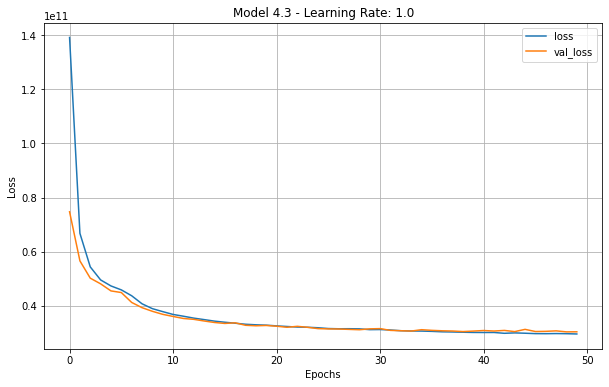


Evaluation Scores
Mean Squared Error: 30370035961.75394
Mean Absolute Error: 107705.17542334278
Regression Score: 0.7642382017349969


In [ ]:
#Evaluation of model 4.3
evaluation(model_43, X_val, y_val, title = 'Model 4.3 - Learning Rate: 1.0')

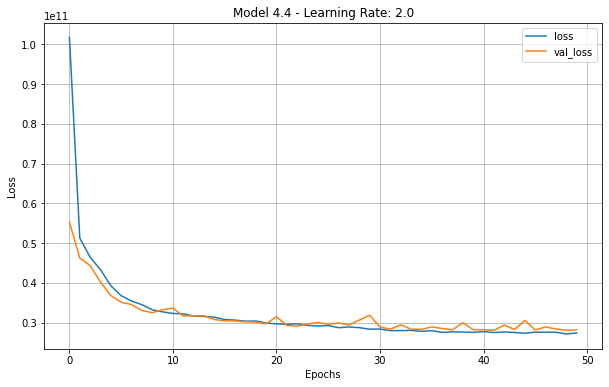


Evaluation Scores
Mean Squared Error: 28157634784.009422
Mean Absolute Error: 106613.03051610944
Regression Score: 0.7835805189367416


In [ ]:
#Evaluation of model 4.4
evaluation(model_44, X_val, y_val, title = 'Model 4.4 - Learning Rate: 2.0')

The best result came for learning rate = 1.0 as it gave a good score, without overfitting unlike for 2.0
We'll fix it and further tune other hyperparameters.

### 5. No. of hidden layers
We'll add one more hidden layer in our model and analyse it.

#### Training

In [ ]:
#Model 5.1 - Hidden Layers: 2
model_51 = Sequential()

#Input Layer
model_51.add(Input(shape = X_train.shape[1:]))

#Hidden Layers
model_51.add(Dense(10, activation = 'relu'))
model_51.add(Dense(10, activation = 'relu'))

#Output Layer
model_51.add(Dense(1, activation = 'relu'))

#Compilation
model_51.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_51.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 85059256320.0000 - val_loss: 47107633152.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 40955957248.0000 - val_loss: 35350257664.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 36334116864.0000 - val_loss: 33566670848.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 34741460992.0000 - val_loss: 35744944128.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 33603878912.0000 - val_loss: 31423576064.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 33623042048.0000 - val_loss: 32910368768.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 32547207168.0000 - val_loss: 31594579968.0000
Epoch 8/50
473/473 [==============================] - 2s 3ms/step - loss: 32185206784.0000 - val_loss: 30507550720.0000
Epoch 9/50
473/473 [====================

#### Evaluation

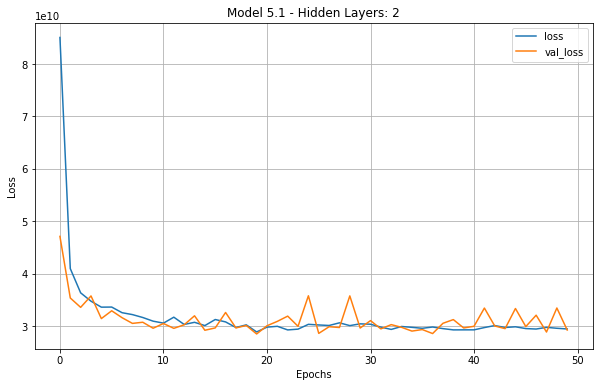


Evaluation Scores
Mean Squared Error: 29239499292.905914
Mean Absolute Error: 105722.737260401
Regression Score: 0.7739384051381963


In [ ]:
#Evaluation of model 5.1
evaluation(model_51, X_val, y_val, title = 'Model 5.1 - Hidden Layers: 2')

By increasing the no. of hidden layers, the model started to overfit on the training data which lead to instability in correctly predicting the validation data. Although the evaluation metrics for this seemed to be better than before but we can't accept it as its overfitting. Hence, we will be having only 1 hidden layer in our model.

### 6. Number of Neurons - [5, 15, 20]
 

#### Training

In [ ]:
#Model 6.1 - No. of Neurons: 5
model_61 = Sequential()

#Input Layer
model_61.add(Input(shape = X_train.shape[1:]))

#Hidden
model_61.add(Dense(5, activation = 'relu'))

#Output Layer
model_61.add(Dense(1, activation = 'relu'))

#Compilation
model_61.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_61.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 142022819840.0000 - val_loss: 73637339136.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 65162108928.0000 - val_loss: 55394025472.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 52968091648.0000 - val_loss: 48603811840.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 47572684800.0000 - val_loss: 44850171904.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 43924439040.0000 - val_loss: 42299351040.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 41865326592.0000 - val_loss: 40256856064.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 40392937472.0000 - val_loss: 39044304896.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 39047610368.0000 - val_loss: 38264336384.0000
Epoch 9/50
473/473 [===================

In [ ]:
#Model 6.2 - No. of Neurons: 15
model_62 = Sequential()

#Input Layer
model_62.add(Input(shape = X_train.shape[1:]))

#Hidden
model_62.add(Dense(15, activation = 'relu'))

#Output Layer
model_62.add(Dense(1, activation = 'relu'))

#Compilation
model_62.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_62.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 120725520384.0000 - val_loss: 67032641536.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 59335131136.0000 - val_loss: 52130959360.0000
Epoch 3/50
473/473 [==============================] - 2s 3ms/step - loss: 50206081024.0000 - val_loss: 47841972224.0000
Epoch 4/50
473/473 [==============================] - 2s 3ms/step - loss: 46952722432.0000 - val_loss: 45293035520.0000
Epoch 5/50
473/473 [==============================] - 2s 3ms/step - loss: 45350133760.0000 - val_loss: 43544559616.0000
Epoch 6/50
473/473 [==============================] - 2s 3ms/step - loss: 42796216320.0000 - val_loss: 40857931776.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 39669686272.0000 - val_loss: 37928841216.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 37487747072.0000 - val_loss: 36220329984.0000
Epoch 9/50
473/473 [===================

In [ ]:
#Model 6.3 - No. of Neurons: 20
model_63 = Sequential()

#Input Layer
model_63.add(Input(shape = X_train.shape[1:]))

#Hidden
model_63.add(Dense(20, activation = 'relu'))

#Output Layer
model_63.add(Dense(1, activation = 'relu'))

#Compilation
model_63.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_63.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
473/473 [==============================] - 2s 4ms/step - loss: 123535638528.0000 - val_loss: 67088715776.0000
Epoch 2/50
473/473 [==============================] - 2s 4ms/step - loss: 59825442816.0000 - val_loss: 52136243200.0000
Epoch 3/50
473/473 [==============================] - 2s 4ms/step - loss: 50673201152.0000 - val_loss: 47288532992.0000
Epoch 4/50
473/473 [==============================] - 2s 4ms/step - loss: 47327186944.0000 - val_loss: 45423337472.0000
Epoch 5/50
473/473 [==============================] - 2s 4ms/step - loss: 45275480064.0000 - val_loss: 42666577920.0000
Epoch 6/50
473/473 [==============================] - 2s 4ms/step - loss: 42094940160.0000 - val_loss: 40121159680.0000
Epoch 7/50
473/473 [==============================] - 2s 4ms/step - loss: 39522500608.0000 - val_loss: 38031134720.0000
Epoch 8/50
473/473 [==============================] - 2s 4ms/step - loss: 37532659712.0000 - val_loss: 36294909952.0000
Epoch 9/50
473/473 [===================

#### Evaluation

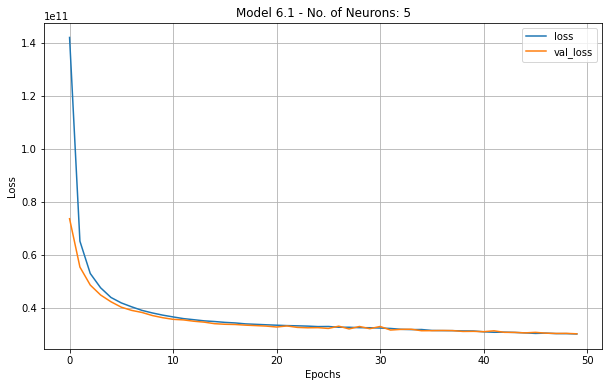


Evaluation Scores
Mean Squared Error: 30216137022.7264
Mean Absolute Error: 106165.88601541938
Regression Score: 0.7652214924718839


In [ ]:
#Evaluation of model 6.1
evaluation(model_61, X_val, y_val, title = 'Model 6.1 - No. of Neurons: 5')

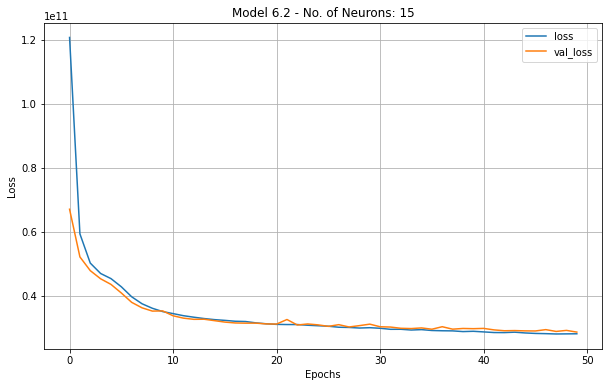


Evaluation Scores
Mean Squared Error: 28634651255.57621
Mean Absolute Error: 104267.56456248554
Regression Score: 0.7777121216926886


In [ ]:
#Evaluation of model 6.2
evaluation(model_62, X_val, y_val, title = 'Model 6.2 - No. of Neurons: 15')

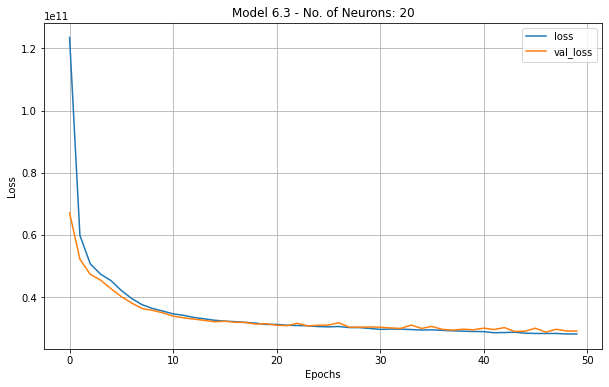


Evaluation Scores
Mean Squared Error: 29008736324.78112
Mean Absolute Error: 107241.5745520285
Regression Score: 0.7766198750386297


In [ ]:
#Evaluation of model 6.3
evaluation(model_63, X_val, y_val, title = 'Model 6.3 - No. of Neurons: 20')

Even though the score for 20 neurons is better than the rest, it is overfitting on the training set as we can see it in the graph for higher epochs, the validation loss increases. We can choose neurons to be 15 as it is also giving us better results than choosing 10. Later, if the model overfits for higher no. of epochs and neurons = 15, we can always switch back to neurons = 10. But now we are fixing the number of neurons in the hidden layer to be 15.

### 7. Batch Size - [8, 16, 64, 128]  
32 is not being taken as it is in the base model.

#### Training

In [ ]:
#Model 7.1 - Batch Size: 8
model_71 = Sequential()

#Input Layer
model_71.add(Input(shape = X_train.shape[1:]))

#Hidden
model_71.add(Dense(15, activation = 'relu'))

#Output Layer
model_71.add(Dense(1, activation = 'relu'))

#Compilation
model_71.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_71.fit(X_train, y_train, batch_size = 8, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
1892/1892 [==============================] - 7s 4ms/step - loss: 90615767040.0000 - val_loss: 51130626048.0000
Epoch 2/50
1892/1892 [==============================] - 7s 3ms/step - loss: 46890016768.0000 - val_loss: 43596267520.0000
Epoch 3/50
1892/1892 [==============================] - 7s 3ms/step - loss: 41434124288.0000 - val_loss: 39242661888.0000
Epoch 4/50
1892/1892 [==============================] - 7s 4ms/step - loss: 38992920576.0000 - val_loss: 37409075200.0000
Epoch 5/50
1892/1892 [==============================] - 7s 3ms/step - loss: 37424082944.0000 - val_loss: 36844752896.0000
Epoch 6/50
1892/1892 [==============================] - 7s 3ms/step - loss: 36106473472.0000 - val_loss: 34918563840.0000
Epoch 7/50
1892/1892 [==============================] - 7s 4ms/step - loss: 34962108416.0000 - val_loss: 33751402496.0000
Epoch 8/50
1892/1892 [==============================] - 6s 3ms/step - loss: 34104965120.0000 - val_loss: 33721032704.0000
Epoch 9/50
1892/1892 [==

In [ ]:
#Model 7.2 - Batch Size: 16
model_72 = Sequential()

#Input Layer
model_72.add(Input(shape = X_train.shape[1:]))

#Hidden
model_72.add(Dense(15, activation = 'relu'))

#Output Layer
model_72.add(Dense(1, activation = 'relu'))

#Compilation
model_72.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_72.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
946/946 [==============================] - 4s 4ms/step - loss: 96675299328.0000 - val_loss: 55029252096.0000
Epoch 2/50
946/946 [==============================] - 3s 3ms/step - loss: 50338246656.0000 - val_loss: 45244329984.0000
Epoch 3/50
946/946 [==============================] - 3s 4ms/step - loss: 44280131584.0000 - val_loss: 42139906048.0000
Epoch 4/50
946/946 [==============================] - 3s 4ms/step - loss: 41482711040.0000 - val_loss: 39323910144.0000
Epoch 5/50
946/946 [==============================] - 3s 3ms/step - loss: 39059107840.0000 - val_loss: 37519437824.0000
Epoch 6/50
946/946 [==============================] - 3s 3ms/step - loss: 37005430784.0000 - val_loss: 35684700160.0000
Epoch 7/50
946/946 [==============================] - 3s 3ms/step - loss: 35763314688.0000 - val_loss: 34852134912.0000
Epoch 8/50
946/946 [==============================] - 3s 3ms/step - loss: 34794450944.0000 - val_loss: 34111219712.0000
Epoch 9/50
946/946 [====================

In [ ]:
#Model 7.3 - Batch Size: 64
model_73 = Sequential()

#Input Layer
model_73.add(Input(shape = X_train.shape[1:]))

#Hidden
model_73.add(Dense(15, activation = 'relu'))

#Output Layer
model_73.add(Dense(1, activation = 'relu'))

#Compilation
model_73.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_73.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
237/237 [==============================] - 1s 4ms/step - loss: 195317104640.0000 - val_loss: 89467305984.0000
Epoch 2/50
237/237 [==============================] - 1s 4ms/step - loss: 86670041088.0000 - val_loss: 75441635328.0000
Epoch 3/50
237/237 [==============================] - 1s 3ms/step - loss: 72584486912.0000 - val_loss: 64228196352.0000
Epoch 4/50
237/237 [==============================] - 1s 4ms/step - loss: 62308151296.0000 - val_loss: 56898953216.0000
Epoch 5/50
237/237 [==============================] - 1s 4ms/step - loss: 56051576832.0000 - val_loss: 52996005888.0000
Epoch 6/50
237/237 [==============================] - 1s 3ms/step - loss: 52394303488.0000 - val_loss: 49899945984.0000
Epoch 7/50
237/237 [==============================] - 1s 3ms/step - loss: 49893179392.0000 - val_loss: 47843090432.0000
Epoch 8/50
237/237 [==============================] - 1s 3ms/step - loss: 48209330176.0000 - val_loss: 46568411136.0000
Epoch 9/50
237/237 [===================

In [ ]:
#Model 7.4 - Batch Size: 128
model_74 = Sequential()

#Input Layer
model_74.add(Input(shape = X_train.shape[1:]))

#Hidden
model_74.add(Dense(15, activation = 'relu'))

#Output Layer
model_74.add(Dense(1, activation = 'relu'))

#Compilation
model_74.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_74.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
119/119 [==============================] - 1s 4ms/step - loss: 255883935744.0000 - val_loss: 94432796672.0000
Epoch 2/50
119/119 [==============================] - 0s 4ms/step - loss: 94158684160.0000 - val_loss: 83861454848.0000
Epoch 3/50
119/119 [==============================] - 0s 4ms/step - loss: 83240951808.0000 - val_loss: 74766180352.0000
Epoch 4/50
119/119 [==============================] - 0s 4ms/step - loss: 73737363456.0000 - val_loss: 67323809792.0000
Epoch 5/50
119/119 [==============================] - 0s 4ms/step - loss: 66097930240.0000 - val_loss: 60978638848.0000
Epoch 6/50
119/119 [==============================] - 0s 4ms/step - loss: 60337950720.0000 - val_loss: 56544268288.0000
Epoch 7/50
119/119 [==============================] - 0s 4ms/step - loss: 56224137216.0000 - val_loss: 53029257216.0000
Epoch 8/50
119/119 [==============================] - 0s 4ms/step - loss: 53146157056.0000 - val_loss: 50606850048.0000
Epoch 9/50
119/119 [===================

#### Evaluation

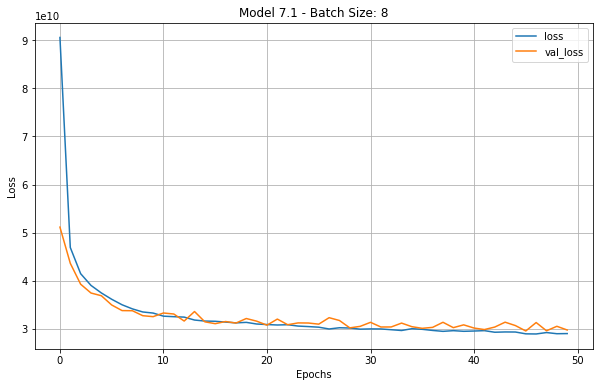


Evaluation Scores
Mean Squared Error: 29709251272.076035
Mean Absolute Error: 108188.33171401406
Regression Score: 0.7708220804498236


In [ ]:
#Evaluation of model 7.1
evaluation(model_71, X_val, y_val, title = 'Model 7.1 - Batch Size: 8')

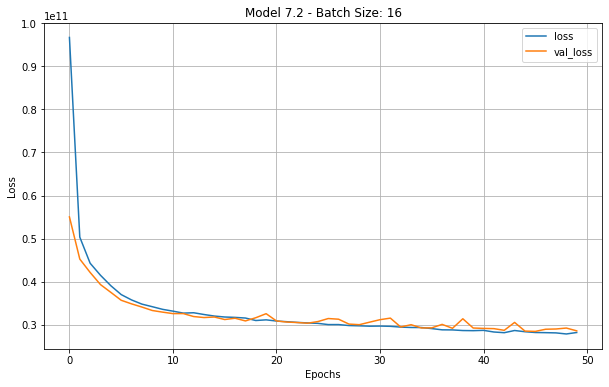


Evaluation Scores
Mean Squared Error: 28587899319.612095
Mean Absolute Error: 103295.69118662512
Regression Score: 0.7788825545675563


In [ ]:
#Evaluation of model 7.2
evaluation(model_72, X_val, y_val, title = 'Model 7.2 - Batch Size: 16')

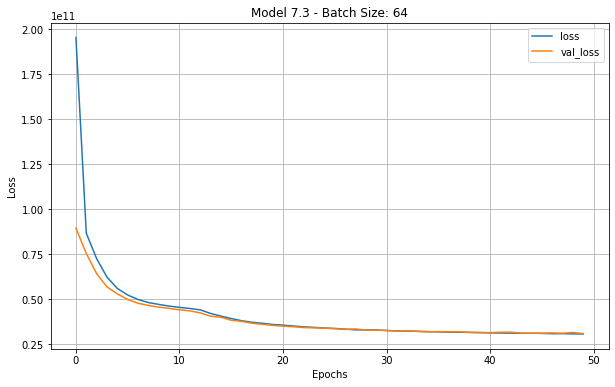


Evaluation Scores
Mean Squared Error: 30985545068.325256
Mean Absolute Error: 109152.16567940913
Regression Score: 0.7597620906449727


In [ ]:
#Evaluation of model 7.3
evaluation(model_73, X_val, y_val, title = 'Model 7.3 - Batch Size: 64')

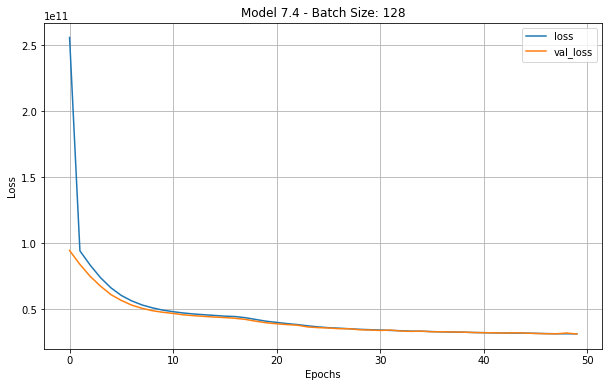


Evaluation Scores
Mean Squared Error: 31148668098.85217
Mean Absolute Error: 107615.54779055559
Regression Score: 0.7580208375476333


In [ ]:
#Evaluation of model 7.4
evaluation(model_74, X_val, y_val, title = 'Model 7.4 - Batch Size: 128')

By looking at the analysis, we can see there is a trade off between accuracy and generalisation. For batch size = 8, there is high score(less error) but the model is overfitting. As we are increasing the batch size, the score is decreasing but the model is generalising well over the validation data. So a good choice of model should be where we are getting good scores but there is no overfitting. Before when we had batch size = 32, there was a little overfitting there so we are choosing batch size = 64 whose score are a little less as compared to 32 but there's good generalisability.

### 8. Epochs - [100, 300, 500]  
50 is not being taken as it is in the base model.

#### Training

In [ ]:
#Model 8.1 - Epochs: 100
model_81 = Sequential()

#Input Layer
model_81.add(Input(shape = X_train.shape[1:]))

#Hidden
model_81.add(Dense(15, activation = 'relu'))

#Output Layer
model_81.add(Dense(1, activation = 'relu'))

#Compilation
model_81.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_81.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
237/237 [==============================] - 1s 4ms/step - loss: 166144032768.0000 - val_loss: 82745655296.0000
Epoch 2/100
237/237 [==============================] - 1s 4ms/step - loss: 77296877568.0000 - val_loss: 65437089792.0000
Epoch 3/100
237/237 [==============================] - 1s 3ms/step - loss: 61630664704.0000 - val_loss: 55403159552.0000
Epoch 4/100
237/237 [==============================] - 1s 3ms/step - loss: 54012252160.0000 - val_loss: 50197315584.0000
Epoch 5/100
237/237 [==============================] - 1s 4ms/step - loss: 50049024000.0000 - val_loss: 47509028864.0000
Epoch 6/100
237/237 [==============================] - 1s 4ms/step - loss: 47700676608.0000 - val_loss: 45813923840.0000
Epoch 7/100
237/237 [==============================] - 1s 4ms/step - loss: 46415765504.0000 - val_loss: 44691365888.0000
Epoch 8/100
237/237 [==============================] - 1s 4ms/step - loss: 45322706944.0000 - val_loss: 43839676416.0000
Epoch 9/100
237/237 [==========

In [ ]:
#Model 8.2 - Epochs: 300
model_82 = Sequential()

#Input Layer
model_82.add(Input(shape = X_train.shape[1:]))

#Hidden
model_82.add(Dense(15, activation = 'relu'))

#Output Layer
model_82.add(Dense(1, activation = 'relu'))

#Compilation
model_82.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_82.fit(X_train, y_train, batch_size = 64, epochs = 300, validation_data = (X_val, y_val))

Epoch 1/300
237/237 [==============================] - 1s 4ms/step - loss: 172833472512.0000 - val_loss: 83798908928.0000
Epoch 2/300
237/237 [==============================] - 1s 3ms/step - loss: 78445379584.0000 - val_loss: 66502672384.0000
Epoch 3/300
237/237 [==============================] - 1s 4ms/step - loss: 63009959936.0000 - val_loss: 56377733120.0000
Epoch 4/300
237/237 [==============================] - 1s 3ms/step - loss: 54787014656.0000 - val_loss: 50920656896.0000
Epoch 5/300
237/237 [==============================] - 1s 3ms/step - loss: 50649640960.0000 - val_loss: 47957901312.0000
Epoch 6/300
237/237 [==============================] - 1s 4ms/step - loss: 48200425472.0000 - val_loss: 46247665664.0000
Epoch 7/300
237/237 [==============================] - 1s 4ms/step - loss: 46663020544.0000 - val_loss: 45042798592.0000
Epoch 8/300
237/237 [==============================] - 1s 4ms/step - loss: 45090856960.0000 - val_loss: 43043749888.0000
Epoch 9/300
237/237 [==========

In [ ]:
#Model 8.3 - Epochs: 300
model_83 = Sequential()

#Input Layer
model_83.add(Input(shape = X_train.shape[1:]))

#Hidden
model_83.add(Dense(15, activation = 'relu'))

#Output Layer
model_83.add(Dense(1, activation = 'relu'))

#Compilation
model_83.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_83.fit(X_train, y_train, batch_size = 64, epochs = 500, validation_data = (X_val, y_val))

Epoch 1/500
237/237 [==============================] - 1s 4ms/step - loss: 164309598208.0000 - val_loss: 81930280960.0000
Epoch 2/500
237/237 [==============================] - 1s 4ms/step - loss: 75717427200.0000 - val_loss: 63679668224.0000
Epoch 3/500
237/237 [==============================] - 1s 4ms/step - loss: 59970048000.0000 - val_loss: 54216982528.0000
Epoch 4/500
237/237 [==============================] - 1s 4ms/step - loss: 53084889088.0000 - val_loss: 49950617600.0000
Epoch 5/500
237/237 [==============================] - 1s 4ms/step - loss: 49456877568.0000 - val_loss: 46922100736.0000
Epoch 6/500
237/237 [==============================] - 1s 4ms/step - loss: 47208935424.0000 - val_loss: 45424021504.0000
Epoch 7/500
237/237 [==============================] - 1s 4ms/step - loss: 45534679040.0000 - val_loss: 45603184640.0000
Epoch 8/500
237/237 [==============================] - 1s 4ms/step - loss: 44033359872.0000 - val_loss: 43273547776.0000
Epoch 9/500
237/237 [==========

#### Evaluation

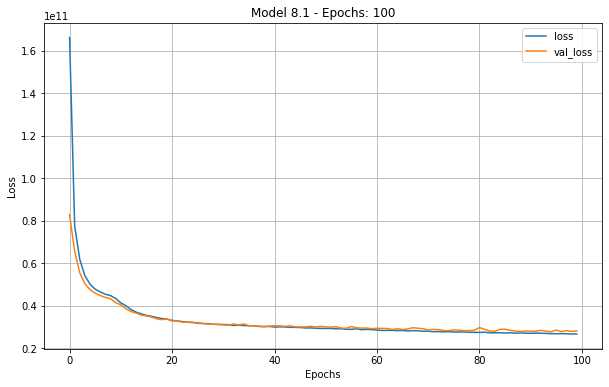


Evaluation Scores
Mean Squared Error: 28081625873.916702
Mean Absolute Error: 103060.29938498254
Regression Score: 0.781855326614513


In [ ]:
#Evaluation of model 8.1
evaluation(model_81, X_val, y_val, title = 'Model 8.1 - Epochs: 100')

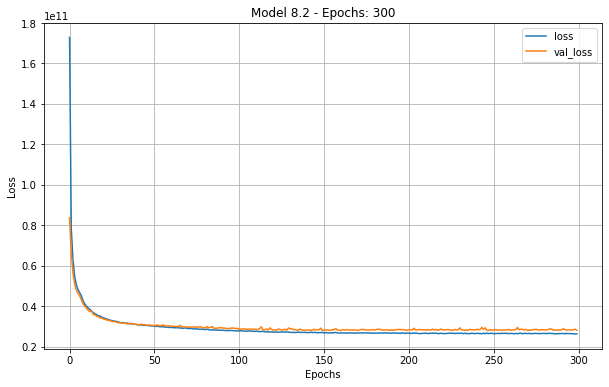


Evaluation Scores
Mean Squared Error: 28096858748.632515
Mean Absolute Error: 104453.90313638796
Regression Score: 0.7820415645781568


In [ ]:
#Evaluation of model 8.2
evaluation(model_82, X_val, y_val, title = 'Model 8.2 - Epochs: 300')

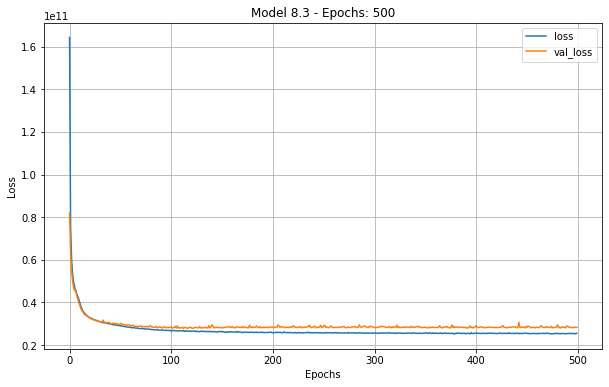


Evaluation Scores
Mean Squared Error: 28292243745.787292
Mean Absolute Error: 103919.03532978077
Regression Score: 0.781485264063501


In [ ]:
#Evaluation of model 8.3
evaluation(model_83, X_val, y_val, title = 'Model 8.3 - Epochs: 500')

The best model among the three is with epochs = 300. It is overfitting a little but we can further fine tune our best 2-3 models and choose the best one among them.

## Fine Tuning Best Models
The top 3 best models among all the one we tested are:
1. Model 4.3
2. Model 6.2
3. Model 8.2

### Model 4.3
Changing epochs from 50 to 100 which may make the algorithm to converge and give us good scores.

In [ ]:
#Model 4.3.1
model_431 = Sequential()

#Input Layer
model_431.add(Input(shape = X_train.shape[1:]))

#Hidden
model_431.add(Dense(10, activation = 'relu'))

#Output Layer
model_431.add(Dense(1, activation = 'relu'))

#Compilation
model_431.compile(optimizer = Adam(learning_rate = 1.0), loss = MeanSquaredError())

#Fitting the model
model_431.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
473/473 [==============================] - 2s 4ms/step - loss: 155522236416.0000 - val_loss: 81952317440.0000
Epoch 2/100
473/473 [==============================] - 2s 3ms/step - loss: 75042897920.0000 - val_loss: 63183949824.0000
Epoch 3/100
473/473 [==============================] - 2s 3ms/step - loss: 59620638720.0000 - val_loss: 53969559552.0000
Epoch 4/100
473/473 [==============================] - 2s 3ms/step - loss: 52930482176.0000 - val_loss: 49683353600.0000
Epoch 5/100
473/473 [==============================] - 2s 3ms/step - loss: 49635483648.0000 - val_loss: 48103772160.0000
Epoch 6/100
473/473 [==============================] - 2s 3ms/step - loss: 47652937728.0000 - val_loss: 45798379520.0000
Epoch 7/100
473/473 [==============================] - 2s 3ms/step - loss: 46438821888.0000 - val_loss: 44734951424.0000
Epoch 8/100
473/473 [==============================] - 2s 3ms/step - loss: 44826116096.0000 - val_loss: 42708815872.0000
Epoch 9/100
473/473 [==========

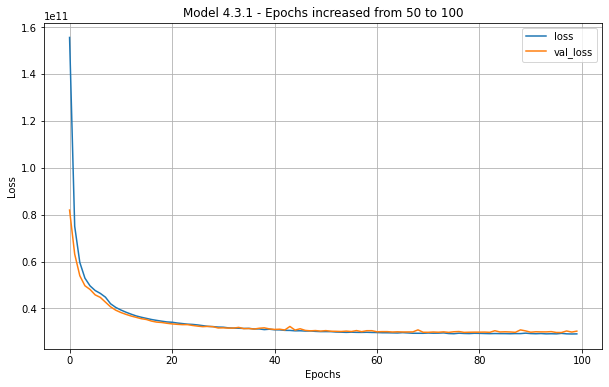


Evaluation Scores
Mean Squared Error: 30345801072.40638
Mean Absolute Error: 106425.54223576325
Regression Score: 0.7649463292724875


In [ ]:
#Evaluation of model 4.3.1
evaluation(model_431, X_val, y_val, title = 'Model 4.3.1 - Epochs increased from 50 to 100')

By increasing the epochs the model makes a little improvement in scores but it is not that recognisable.

### Model 6.2
Changing epochs from 50 to 100 which may increase the score and let the algorithm converge.

In [ ]:
#Model 6.2.1 - Increasing epochs from 50 to 100
model_621 = Sequential()

#Input Layer
model_621.add(Input(shape = X_train.shape[1:]))

#Hidden
model_621.add(Dense(15, activation = 'relu'))

#Output Layer
model_621.add(Dense(1, activation = 'relu'))

#Compilation
model_621.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_621.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
473/473 [==============================] - 3s 6ms/step - loss: 126746419200.0000 - val_loss: 68947722240.0000
Epoch 2/100
473/473 [==============================] - 2s 3ms/step - loss: 60865617920.0000 - val_loss: 53271797760.0000
Epoch 3/100
473/473 [==============================] - 2s 4ms/step - loss: 51312603136.0000 - val_loss: 47897989120.0000
Epoch 4/100
473/473 [==============================] - 2s 3ms/step - loss: 47799676928.0000 - val_loss: 46121107456.0000
Epoch 5/100
473/473 [==============================] - 2s 4ms/step - loss: 44868272128.0000 - val_loss: 42764099584.0000
Epoch 6/100
473/473 [==============================] - 2s 3ms/step - loss: 43000590336.0000 - val_loss: 41358028800.0000
Epoch 7/100
473/473 [==============================] - 2s 3ms/step - loss: 41203589120.0000 - val_loss: 39255789568.0000
Epoch 8/100
473/473 [==============================] - 2s 3ms/step - loss: 39194804224.0000 - val_loss: 37657313280.0000
Epoch 9/100
473/473 [==========

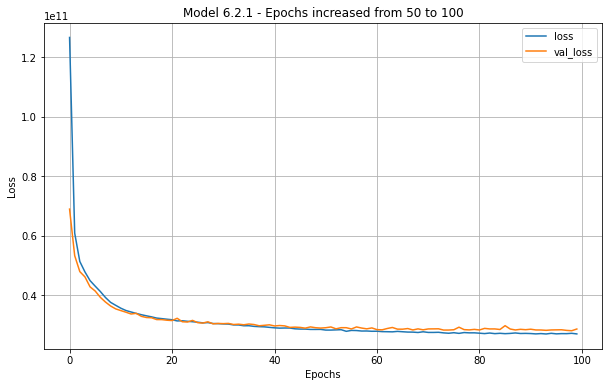


Evaluation Scores
Mean Squared Error: 28572445073.297966
Mean Absolute Error: 104754.0901853887
Regression Score: 0.7782648056991682


In [ ]:
#Evaluation of model 6.2.1
evaluation(model_621, X_val, y_val, title = 'Model 6.2.1 - Epochs increased from 50 to 100')

Again, we see a little improvement in the scores, but it is not enough and if we see closely, there's a little overfitting happening when epochs is large.

### Model 8.2
Decreasing number of neurons to 10 since 8.2 was overfitting and decreasing complexity might make the algorithm more generalisable.

In [ ]:
#Model 8.2.1 - decreasing neurons to 10
model_821 = Sequential()

#Input Layer
model_821.add(Input(shape = X_train.shape[1:]))

#Hidden
model_821.add(Dense(10, activation = 'relu'))

#Output Layer
model_821.add(Dense(1, activation = 'relu'))

#Compilation
model_821.compile(optimizer = Adam(learning_rate = 1), loss = MeanSquaredError())

#Fitting the model
model_821.fit(X_train, y_train, batch_size = 64, epochs = 300, validation_data = (X_val, y_val))

Epoch 1/300
237/237 [==============================] - 1s 4ms/step - loss: 217187909632.0000 - val_loss: 91302600704.0000
Epoch 2/300
237/237 [==============================] - 1s 4ms/step - loss: 89827549184.0000 - val_loss: 78755143680.0000
Epoch 3/300
237/237 [==============================] - 1s 4ms/step - loss: 76737265664.0000 - val_loss: 68272484352.0000
Epoch 4/300
237/237 [==============================] - 1s 4ms/step - loss: 66404896768.0000 - val_loss: 60349435904.0000
Epoch 5/300
237/237 [==============================] - 1s 3ms/step - loss: 59293900800.0000 - val_loss: 55198072832.0000
Epoch 6/300
237/237 [==============================] - 1s 3ms/step - loss: 54856208384.0000 - val_loss: 51790929920.0000
Epoch 7/300
237/237 [==============================] - 1s 3ms/step - loss: 51886145536.0000 - val_loss: 49456824320.0000
Epoch 8/300
237/237 [==============================] - 1s 3ms/step - loss: 49754161152.0000 - val_loss: 47780438016.0000
Epoch 9/300
237/237 [==========

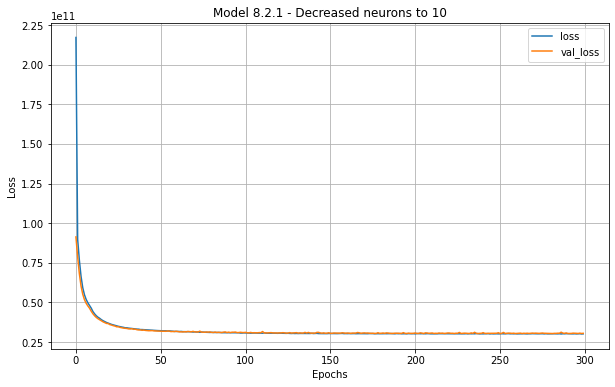


Evaluation Scores
Mean Squared Error: 30466837598.072002
Mean Absolute Error: 110807.1171423097
Regression Score: 0.7634834273412523


In [ ]:
#Evaluation of model 8.2.1
evaluation(model_821, X_val, y_val, title = 'Model 8.2.1 - Decreased neurons to 10')

Looking at the loss graph, this model seems to be the most generalisable and it give good scores overall, less than before but good. We are going to test this model on the test set to see the final test results.

# **Model testing on Test Set**
Model Chosen: Model 8.2.1

In [ ]:
#Evaluating model 8.2.1 on test set
prediction = model_821.predict(X_test)

mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
regression_score = explained_variance_score(y_test, prediction)

print("\nEvaluation Scores")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Regression Score:", regression_score)


Evaluation Scores
Mean Squared Error: 25020542964.271538
Mean Absolute Error: 101698.9003454556
Regression Score: 0.8271148747055983


Looking at the scores, the model is working great on the current dataset.